# Assignment - Bike Sharing System

# Problem Statement
• A bike-sharing system is a service in which bikes are made available for shared use to
individuals on a short-term basis for a price or free. Many bike share systems allow people to
borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the
payment information, and the system unlocks it. This bike can then be returned to another
dock belonging to the same system.

• A US bike-sharing provider BoomBikes has recently suffered considerable dips in their
revenues due to the ongoing Corona pandemic. The company is finding it very difficult to
sustain in the current market scenario. So, it has decided to come up with a mindful business
plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end,
and the economy restores to a healthy state.

• In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


• They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.

2. How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the 
American market based on some factors.

# Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Reading and understanding the data

In [498]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import statsmodels.api as sm

In [219]:
# adding to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [220]:
# reading the bike sharing dataset from csv file
bike = pd.read_csv("day.csv")

In [221]:
# checking the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [222]:
# checking the shape of the dataset
bike.shape

(730, 16)

In [223]:
# describing the columns of the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [224]:
# info about the columns
bike.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [225]:
# checking the null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [226]:
# renaming few columns for better readbility and understanding
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity','weathersit': 'weather_type'}, inplace=True)
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_type,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [227]:
# dropping the duplicates if present
bike = bike.drop_duplicates()

In [228]:
# verifying the shape again
bike.shape

(730, 16)

There are no duplicates found in the dataset


In [230]:
#formatting the daye column and droping the dteday column
bike['dteday'] = bike['dteday'].apply(lambda x: datetime.strptime(x, "%d-%m-%Y"))

In [231]:
bike['date'] = pd.to_datetime(bike['dteday'])
bike = bike.drop('dteday', axis = 1)
bike.head()

,instant,season,year,month,holiday,weekday,workingday,weather_type,temp,atemp,humidity,windspeed,casual,registered,cnt,date
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018-01-01
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018-01-02
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018-01-03
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018-01-04
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018-01-05


In [232]:
# dropping the unwanted columns 
# instant has only index for the row, dteday has date which can be compensated by year and month column
# casual and registered seems to be the breakup by category for cnt column.
bike = bike.drop(['instant','casual','registered'],axis=1)

In [233]:
bike.head()

,season,year,month,holiday,weekday,workingday,weather_type,temp,atemp,humidity,windspeed,cnt,date
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018-01-01
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018-01-02
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018-01-03
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018-01-04
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018-01-05


# Mapping the values of variables

In [258]:
bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Mapping Weather_type
bike['weather_type'] = bike['weather_type'].map({1: 'Clear or Few clouds', 2: 'Mist and Few Clouds',  
                                                     3: 'Light Snow and Light Rain', 4: 'Heavy Rain + Heavy Snow'})

# Mapping Weeday
bike['weekday'] = bike['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                     4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Mapping Month
bike['month'] = bike['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                                 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [262]:
bike.head()

,season,year,month,holiday,weekday,workingday,weather_type,temp,atemp,humidity,windspeed,cnt,date
0,spring,0,Jan,0,Saturday,0,Mist and Few Clouds,14.110847,18.18125,80.5833,10.749882,985,2018-01-01
1,spring,0,Jan,0,Sunday,0,Mist and Few Clouds,14.902598,17.68695,69.6087,16.652113,801,2018-01-02
2,spring,0,Jan,0,Monday,1,Clear or Few clouds,8.050924,9.47025,43.7273,16.636703,1349,2018-01-03
3,spring,0,Jan,0,Tuesday,1,Clear or Few clouds,8.200000,10.60610,59.0435,10.739832,1562,2018-01-04
4,spring,0,Jan,0,Wednesday,1,Clear or Few clouds,9.305237,11.46350,43.6957,12.522300,1600,2018-01-05


In [264]:
# checking the info of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   season        730 non-null    object        
 1   year          730 non-null    int64         
 2   month         730 non-null    object        
 3   holiday       730 non-null    int64         
 4   weekday       730 non-null    object        
 5   workingday    730 non-null    int64         
 6   weather_type  730 non-null    object        
 7   temp          730 non-null    float64       
 8   atemp         730 non-null    float64       
 9   humidity      730 non-null    float64       
 10  windspeed     730 non-null    float64       
 11  cnt           730 non-null    int64         
 12  date          730 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 74.3+ KB


# Exploratory Data Analysis
Visualising the dataset

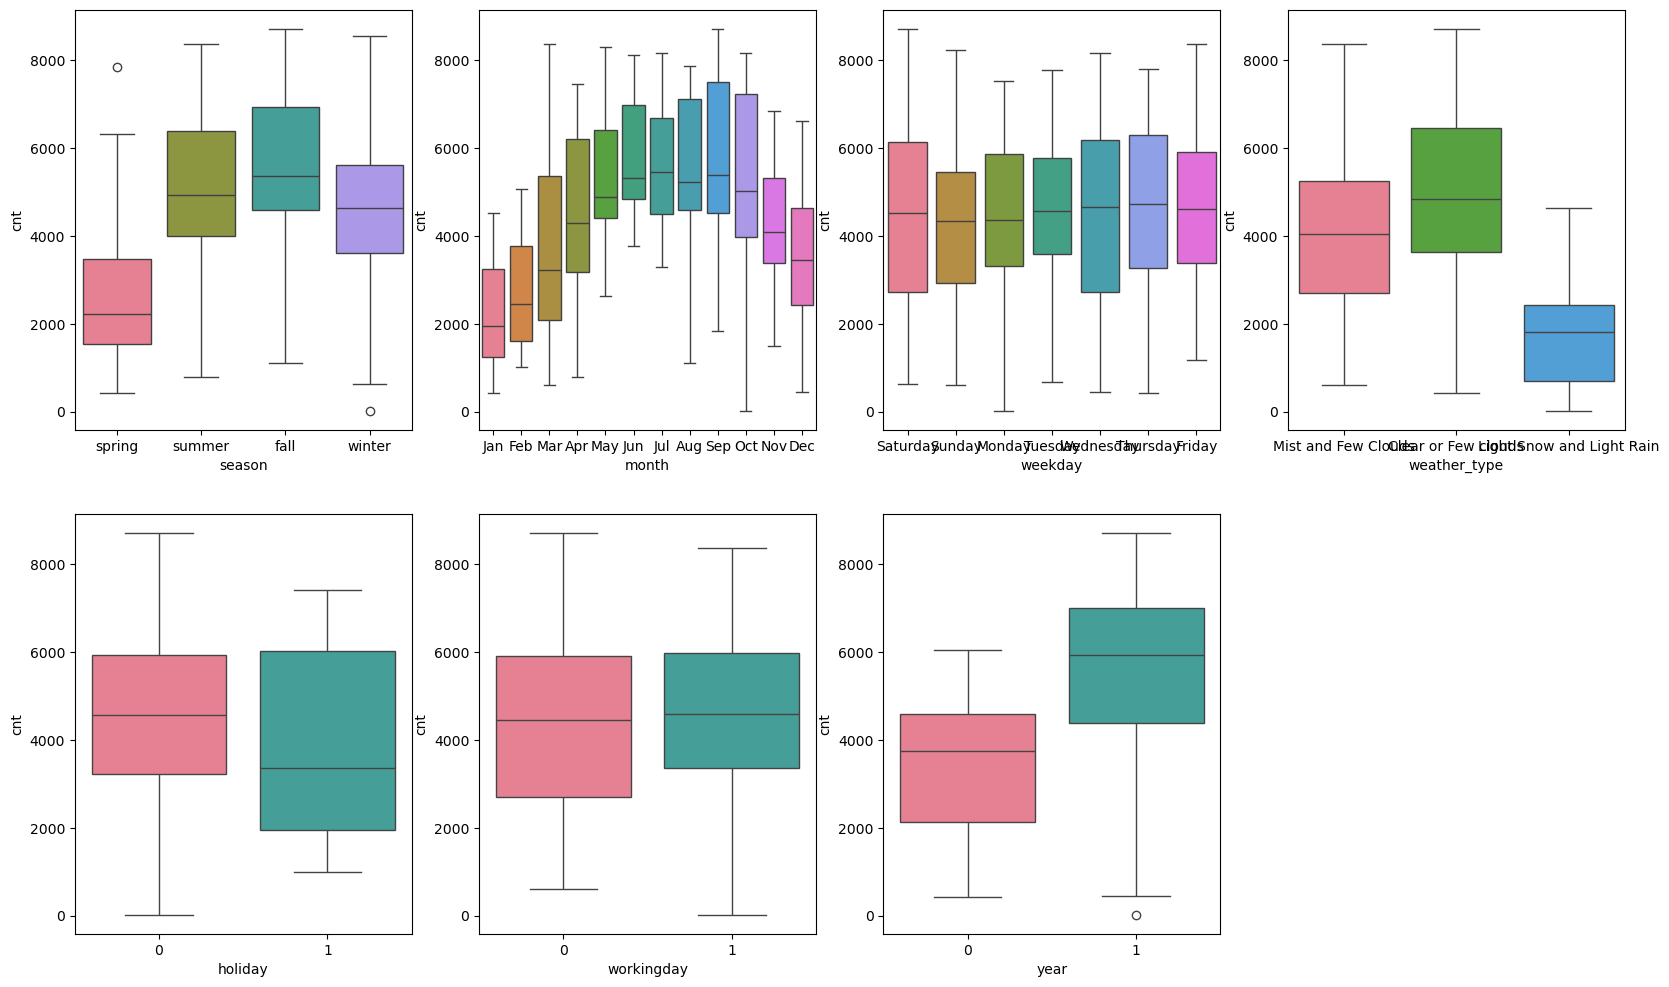

In [267]:
# Visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike, palette="husl")
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike, palette="husl")
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike, palette="husl")
plt.subplot(2,4,4)
sns.boxplot(x = 'weather_type', y = 'cnt', data = bike, palette="husl")
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data =bike, palette="husl")
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike, palette="husl")
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike, palette="husl")
plt.show()

In [269]:
# barplot related to categorical columns
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=bike, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

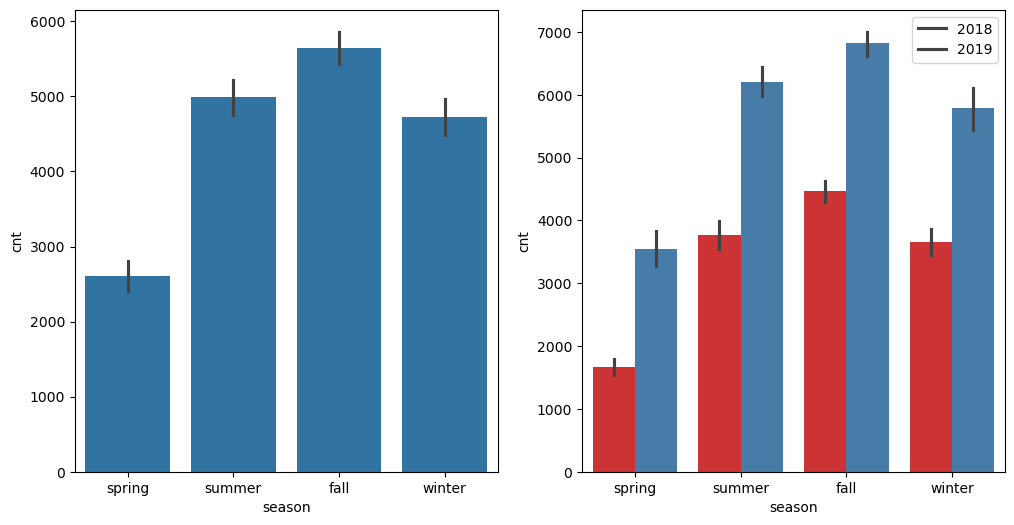

In [271]:
# plot visualization for season column
plot_cat_columns('season')

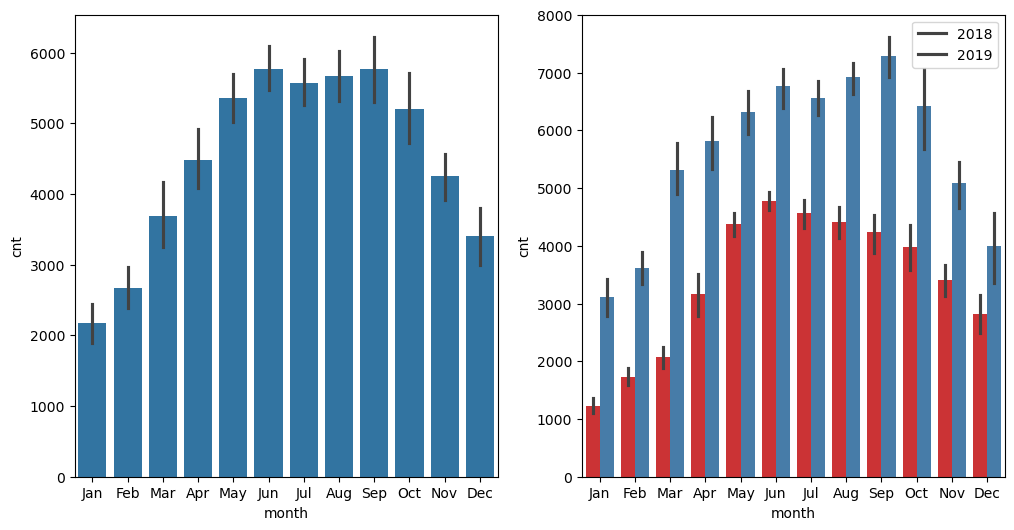

In [273]:
# plot visualization for month column
plot_cat_columns('month')

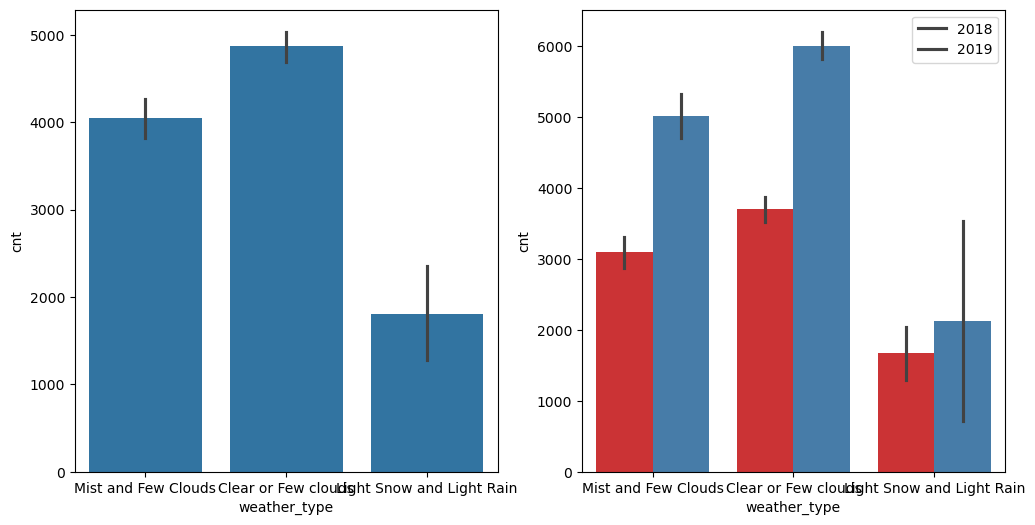

In [275]:
# plot visualization for weathersit column
plot_cat_columns('weather_type')

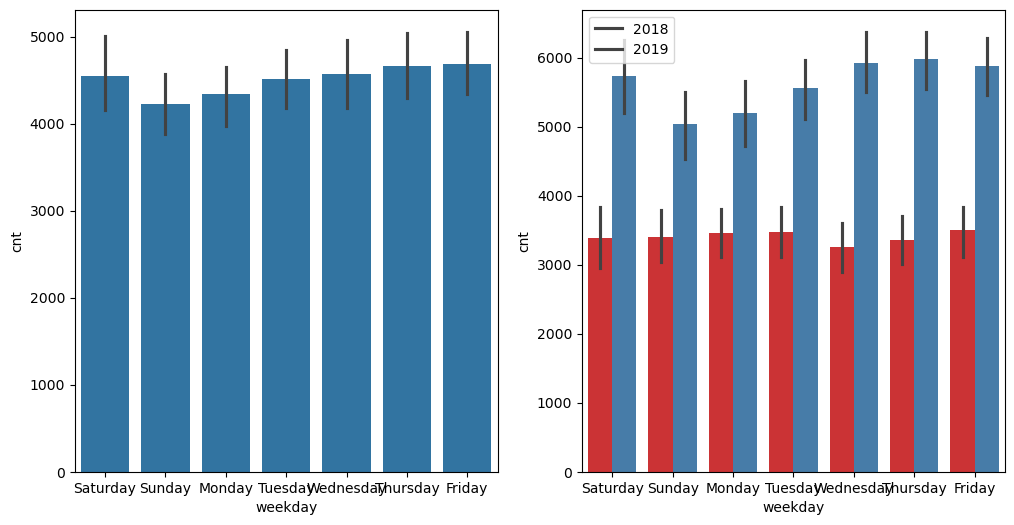

In [277]:
# plot visualization for weekday column
plot_cat_columns('weekday')

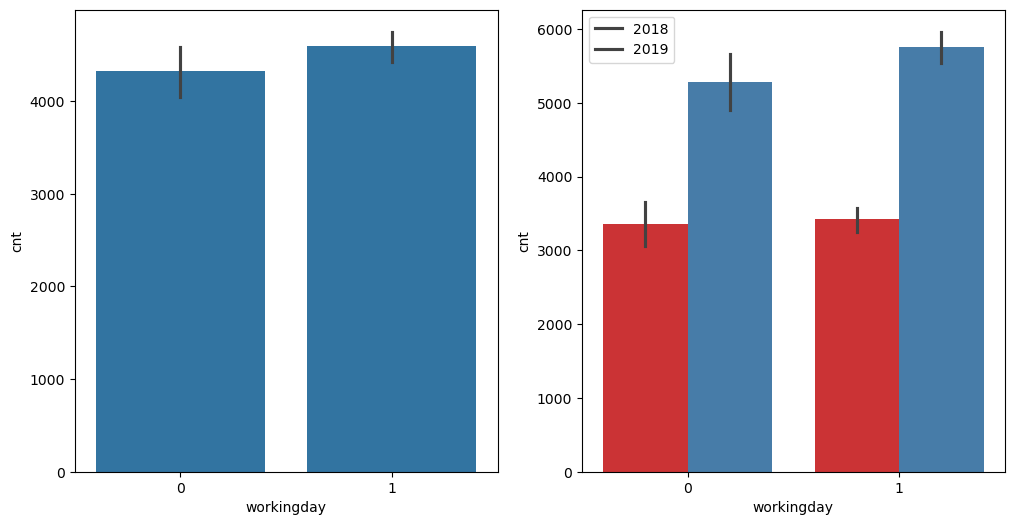

In [279]:
# plot visualization for workingday column
plot_cat_columns('workingday')

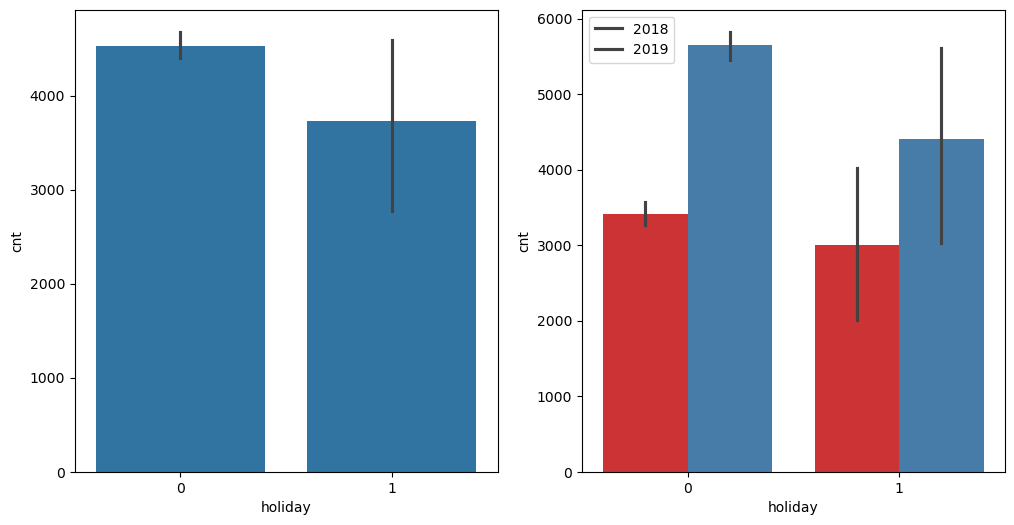

In [281]:
# plot visualization for holiday column
plot_cat_columns('holiday')

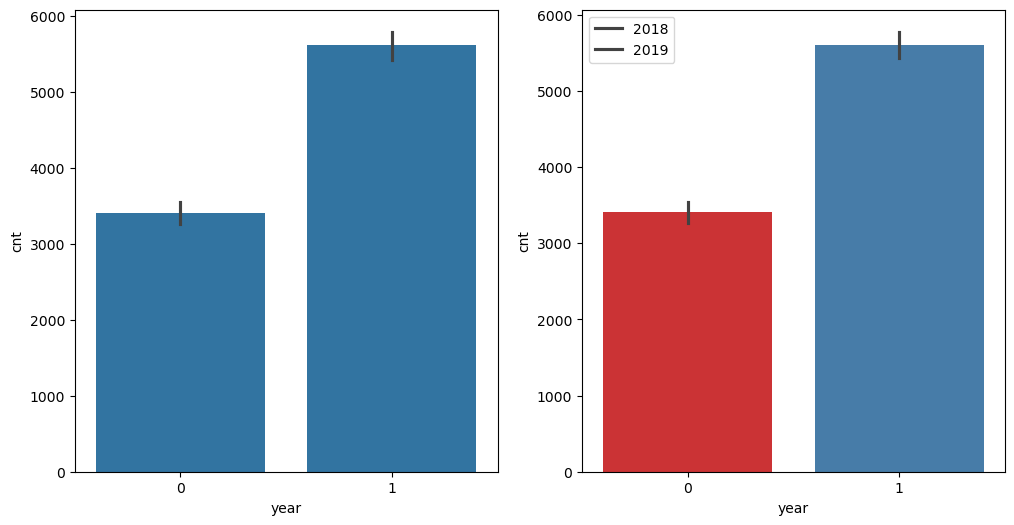

In [283]:
# plot visualization for year column
plot_cat_columns('year')

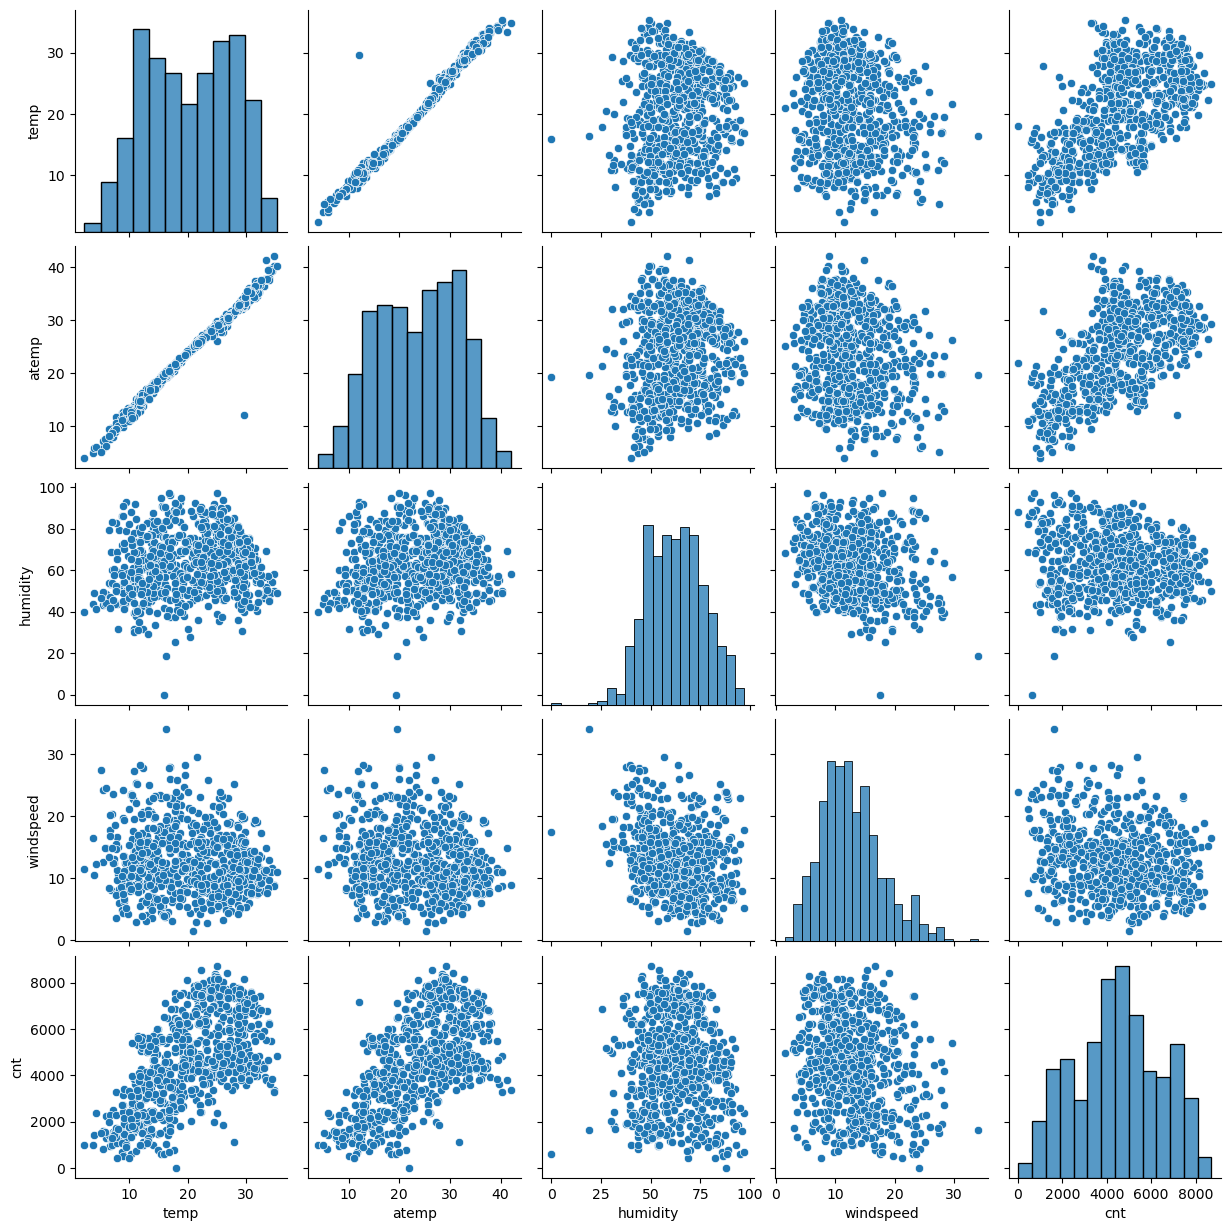

In [285]:
# Visualizing all the numerical columns
sns.pairplot(data=bike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

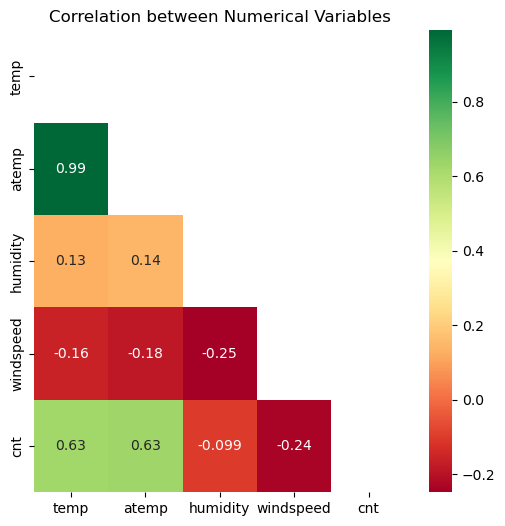

In [287]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bike[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bike[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# Data Preparation

In [326]:
bike_seasons = pd.get_dummies(bike['season'], drop_first = True)

## get_dummies provides 'True and False' but, We need 0 and 1 so mapping True as 1 and False as 0
bike_seasons = bike_seasons.apply(lambda x: x.map({True:1, False:0}))

bike_seasons

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [311]:
bike_weather_type = pd.get_dummies(bike['weather_type'], drop_first = True)

## get_dummies provides 'True and False' but, We need 0 and 1 so mapping True as 1 and False as 0
bike_weather_type = bike_weather_type.apply(lambda x: x.map({True:1, False:0}))

bike_weather_type

,Light Snow and Light Rain,Mist and Few Clouds
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [322]:
bike_weekdays = pd.get_dummies(bike['weekday'], drop_first = True)

## get_dummies provides 'True and False' but, We need 0 and 1 so mapping True as 1 and False as 0
bike_weekdays = bike_weekdays.apply(lambda x: x.map({True:1, False:0}))

bike_weekdays

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [318]:
bike_months = pd.get_dummies(bike['month'], drop_first = True)

## get_dummies provides 'True and False' but, We need 0 and 1 so mapping True as 1 and False as 0
bike_months = bike_months.apply(lambda x: x.map({True:1, False:0}))

bike_months

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


# Concatenating DataFrames

In [328]:
# Merging  the dataframe, with the dummy variable dataset. 

bike = pd.concat([bike,bike_months,bike_weekdays,bike_weather_type,bike_seasons],axis=1)
bike.head()

,season,year,month,holiday,weekday,workingday,weather_type,temp,atemp,humidity,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Light Rain,Mist and Few Clouds,spring,summer,winter
0,spring,0,Jan,0,Saturday,0,Mist and Few Clouds,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sunday,0,Mist and Few Clouds,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Monday,1,Clear or Few clouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tuesday,1,Clear or Few clouds,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wednesday,1,Clear or Few clouds,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [330]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   season                     730 non-null    object        
 1   year                       730 non-null    int64         
 2   month                      730 non-null    object        
 3   holiday                    730 non-null    int64         
 4   weekday                    730 non-null    object        
 5   workingday                 730 non-null    int64         
 6   weather_type               730 non-null    object        
 7   temp                       730 non-null    float64       
 8   atemp                      730 non-null    float64       
 9   humidity                   730 non-null    float64       
 10  windspeed                  730 non-null    float64       
 11  cnt                        730 non-null    int64         
 12  date    

In [332]:
#Dropping the variables
bike = bike.drop(['season', 'weather_type', 'weekday', 'month'], axis = 1)
bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,date,Aug,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Light Rain,Mist and Few Clouds,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,2018-01-01,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,2018-01-02,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2018-01-03,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,2018-01-04,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,2018-01-05,0,...,0,0,0,0,1,0,0,1,0,0


In [336]:
bike.shape

(730, 31)

In [338]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   year                       730 non-null    int64         
 1   holiday                    730 non-null    int64         
 2   workingday                 730 non-null    int64         
 3   temp                       730 non-null    float64       
 4   atemp                      730 non-null    float64       
 5   humidity                   730 non-null    float64       
 6   windspeed                  730 non-null    float64       
 7   cnt                        730 non-null    int64         
 8   date                       730 non-null    datetime64[ns]
 9   Aug                        730 non-null    int64         
 10  Dec                        730 non-null    int64         
 11  Feb                        730 non-null    int64         
 12  Jan     

## Linear Regression Model Building

In [341]:
# Dropping the column 'date'
bike = bike.drop('date', axis =1 )
bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Light Rain,Mist and Few Clouds,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


## Splitting the Data into Training and Testing Sets 70:30

In [344]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [346]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [348]:
# check the shape of testing datatset

df_test.shape

(220, 30)

In [350]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [352]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Light Rain,Mist and Few Clouds,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [354]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [356]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Light Rain,Mist and Few Clouds,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [358]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Light Rain,Mist and Few Clouds,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


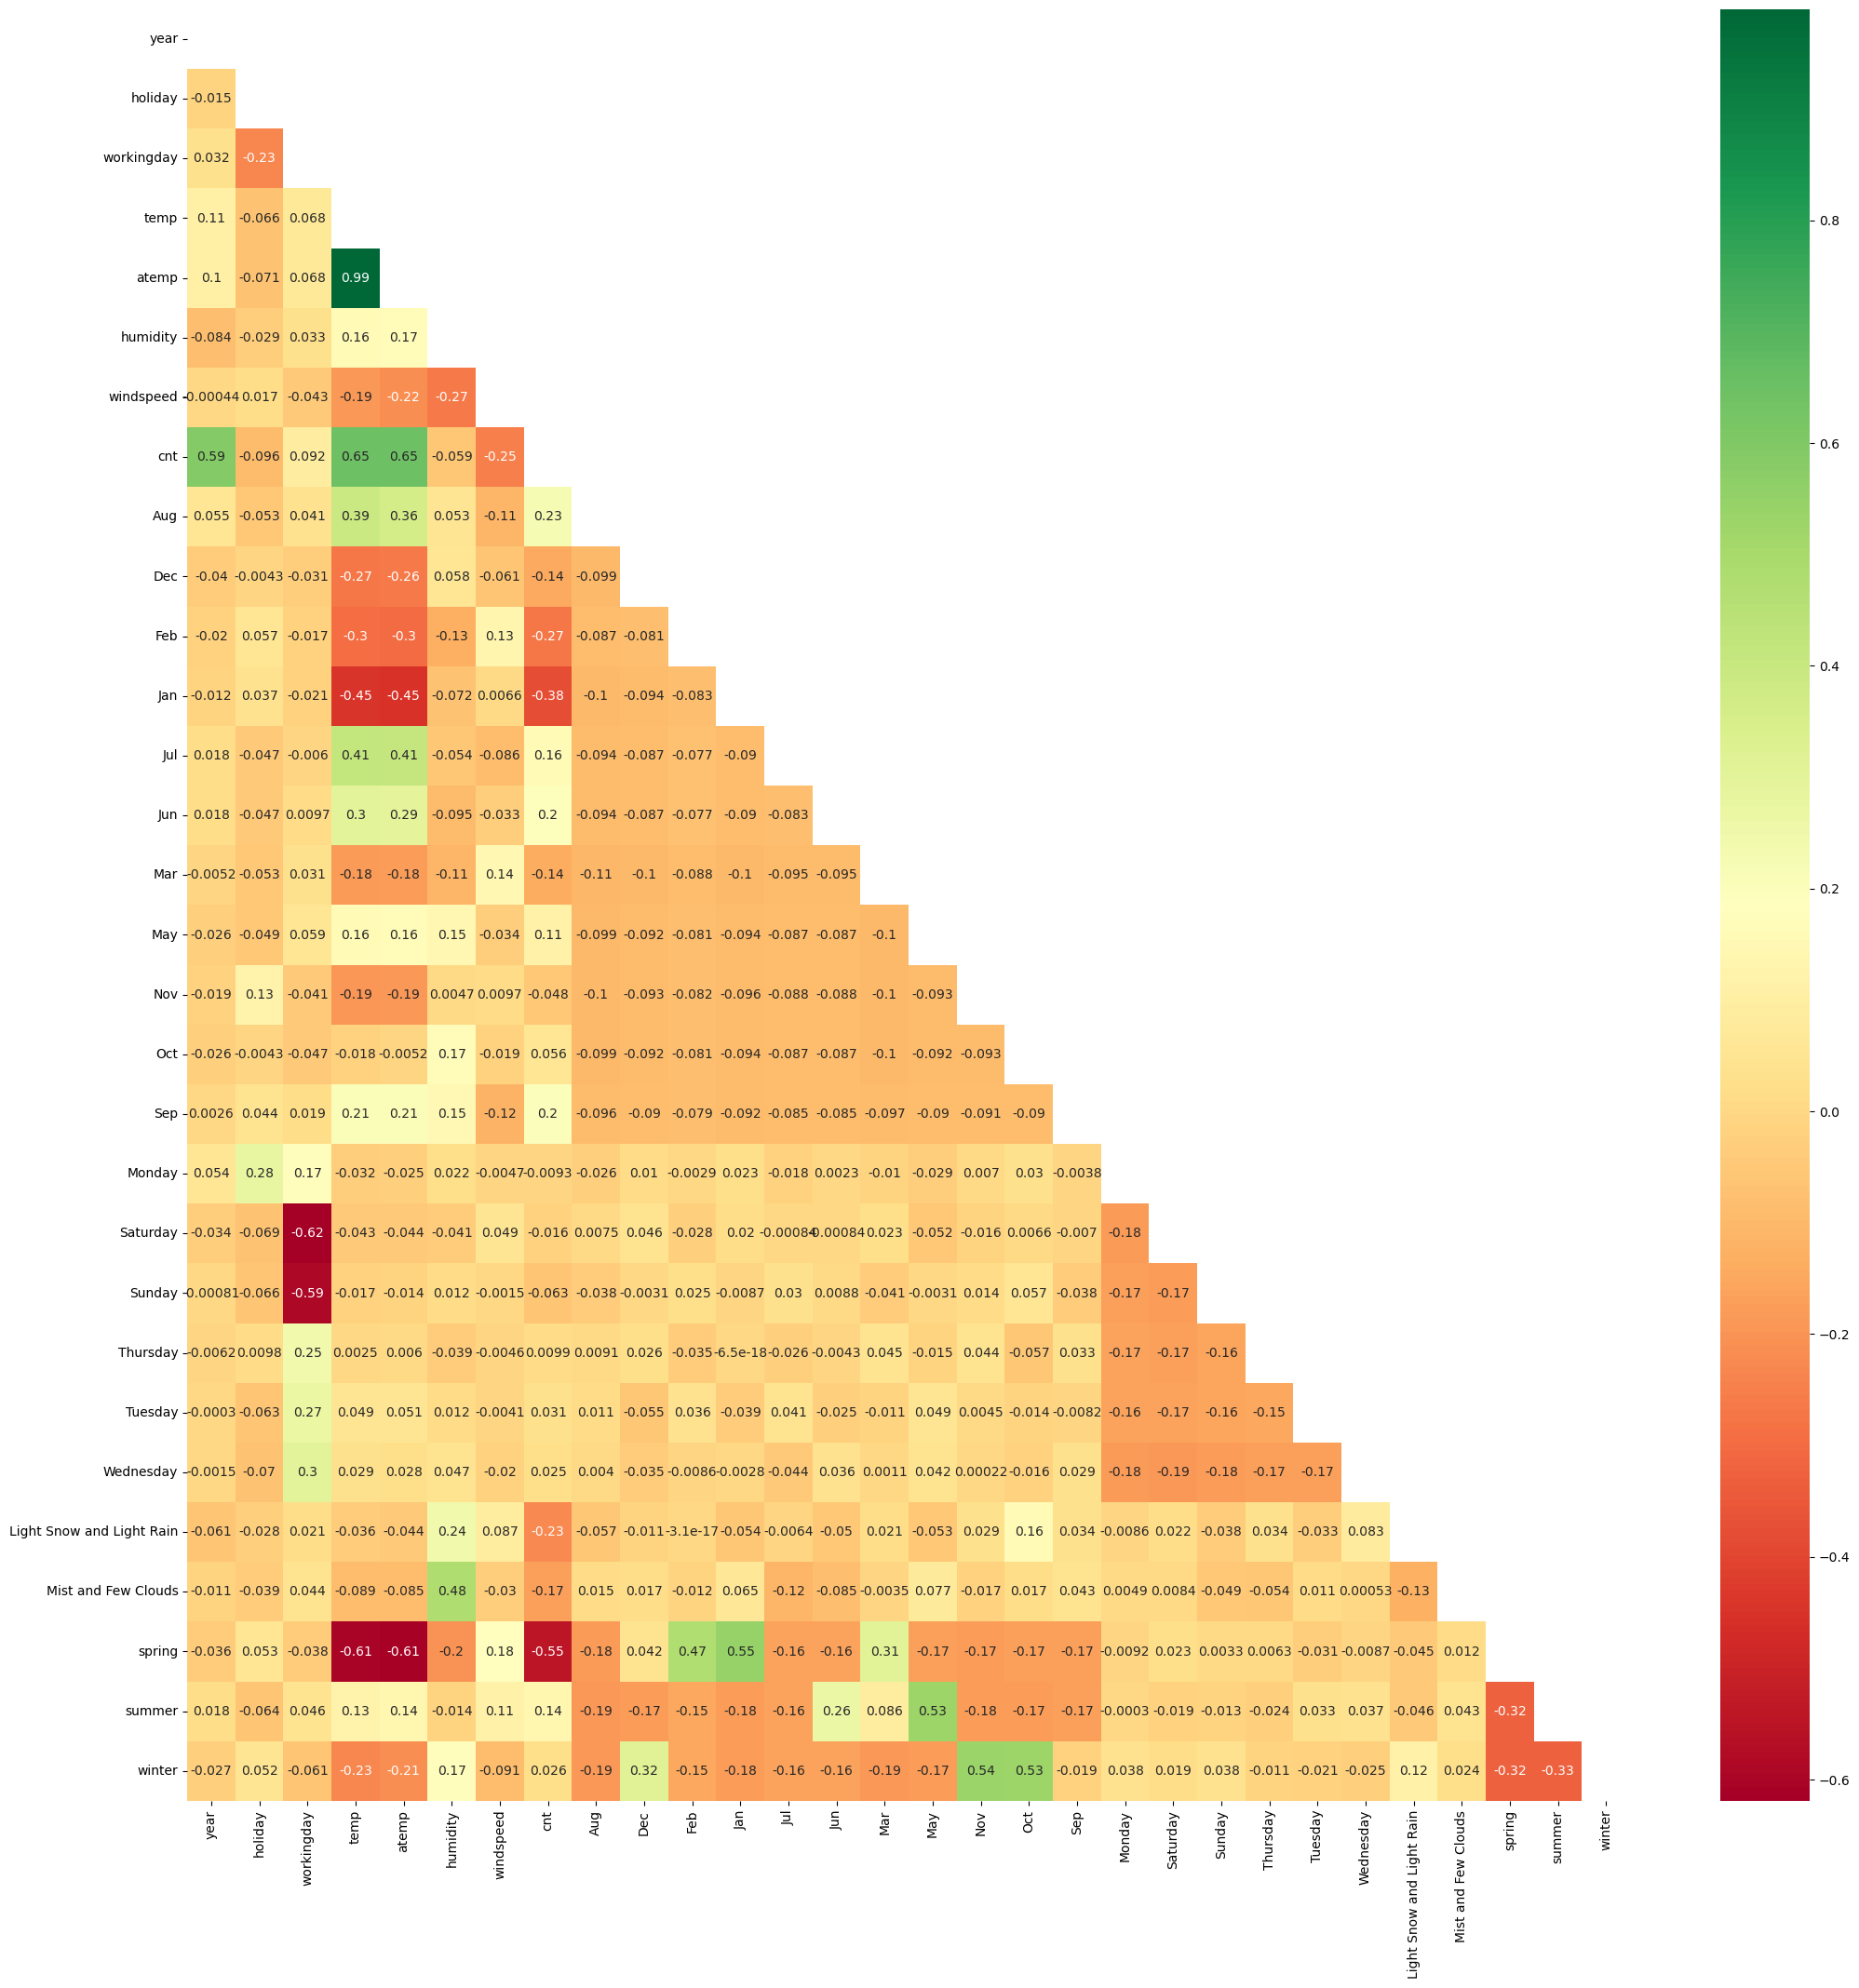

In [360]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

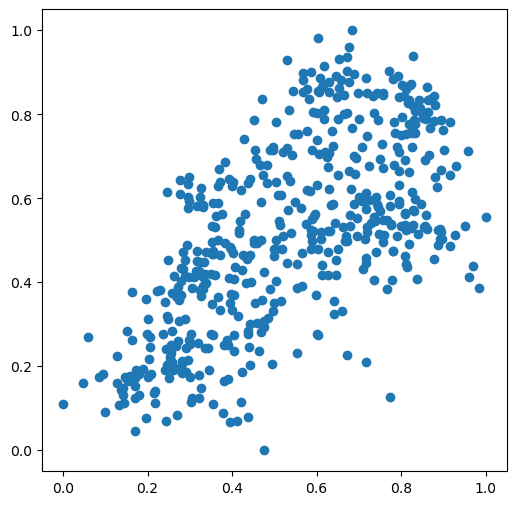

In [362]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

In [365]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

### Build model using RFE (Recursive Feature Elimination)

In [370]:
# Creating instance for LinearRegression

lm = LinearRegression()

In [372]:
lm.fit(X_train, y_train)

# 15 = number of variables we want. RFE will choose the top 15 variables. It is our choice based on our understanding of data.
rfe = RFE(estimator=lm, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

In [374]:
#List of variables selected with their ranks
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 ('Light Snow and Light Rain', True, 1),
 ('Mist and Few Clouds', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [376]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Jan',
       'Jul', 'Sep', 'Saturday', 'Light Snow and Light Rain',
       'Mist and Few Clouds', 'spring', 'summer', 'winter'],
      dtype='object')


In [382]:
# checking which columns has been rejected

col_discard= X_train.columns[~rfe.support_]
col_discard 

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [384]:
X_train_rfe1  = X_train[col]  ## X data with columns selected as True by RFE

In [386]:
X_train_rfe1.head()

,year,holiday,workingday,temp,humidity,windspeed,Jan,Jul,Sep,Saturday,Light Snow and Light Rain,Mist and Few Clouds,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0


# Building a linear model

In [421]:
#Creating model#1
X_train_rfe1_sm = sm.add_constant(X_train_rfe1)
lr1 = sm.OLS(y_train, X_train_rfe1_sm)
lr1_model = lr1.fit()
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          4.22e-191
Time:                        17:51:57   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2519      0.036      6.969      0.000       0.181       0.323
year                          0.2305      0.008     28.795      0.000       0.215       0.246
holiday                      -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                    0.0433      0.012      3.762      0.000       0.021       0.066
temp                          0.5096      0.034     14.837      0.000       0.442       0.577
humidity                     -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                    -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Jan                          -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul                          -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep                           0.0814      0.016      4.945      0.000       0.049       0.114
Saturday                      0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow and Light Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist and Few Clouds          -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring                       -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer                        0.0508      0.015      3.423      0.001       0.022       0.080
winter                        0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [423]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe1.columns
vf['VIF_values'] = [VIF(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Mist and Few Clouds,2.29
0,year,2.09
9,Saturday,1.98


In [427]:
# Discarding variable 'perceived_temp': high VIF
X_train_rfe2 = X_train_rfe1.drop('humidity', axis = 1)

In [429]:
# Building 2nd linear regression model

X_train_rfe2_sm = sm.add_constant(X_train_rfe2)
lr2 = sm.OLS(y_train, X_train_rfe2_sm)
lr2_model = lr2.fit()
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          1.60e-188
Time:                        17:55:55   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1737      0.031      5.520      0.000       0.112       0.235
year                          0.2345      0.008     29.009      0.000       0.219       0.250
holiday                      -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday                    0.0464      0.012      3.966      0.000       0.023       0.069
temp                          0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                    -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Jan                          -0.0392      0.018     -2.227      0.026      -0.074      -0.005
Jul                          -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep                           0.0755      0.017      4.527      0.000       0.043       0.108
Saturday                      0.0583      0.015      3.968      0.000       0.029       0.087
Light Snow and Light Rain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Mist and Few Clouds          -0.0813      0.009     -9.437      0.000      -0.098      -0.064
spring                       -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer                        0.0445      0.015      2.967      0.003       0.015       0.074
winter                        0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [431]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe2.columns
vf['VIF_values'] = [VIF(X_train_rfe2, i) for i in range(X_train_rfe2.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,Saturday,1.97
5,Jan,1.62
6,Jul,1.59


In [433]:
# Discarding variable 'temp': high VIF
X_train_rfe3 = X_train_rfe2.drop('temp', axis = 1)

In [435]:
# Creating model#3

X_train_rfe3_sm = sm.add_constant(X_train_rfe3)
lr3 = sm.OLS(y_train, X_train_rfe3_sm)
lr3_model = lr3.fit()
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          6.44e-154
Time:                        17:57:29   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.5444      0.020     27.118      0.000       0.505       0.584
year                          0.2478      0.009     26.153      0.000       0.229       0.266
holiday                      -0.0567      0.032     -1.757      0.080      -0.120       0.007
workingday                    0.0478      0.014      3.466      0.001       0.021       0.075
windspeed                    -0.1878      0.029     -6.426      0.000      -0.245      -0.130
Jan                          -0.1026      0.020     -5.112      0.000      -0.142      -0.063
Jul                          -0.0095      0.021     -0.446      0.656      -0.052       0.032
Sep                           0.0710      0.020      3.610      0.000       0.032       0.110
Saturday                      0.0562      0.017      3.243      0.001       0.022       0.090
Light Snow and Light Rain    -0.3034      0.029    -10.593      0.000      -0.360      -0.247
Mist and Few Clouds          -0.0882      0.010     -8.688      0.000      -0.108      -0.068
spring                       -0.2602      0.018    -14.483      0.000      -0.296      -0.225
summer                       -0.0427      0.016     -2.651      0.008      -0.074      -0.011
winter                       -0.0762      0.016     -4.903      0.000      -0.107      -0.046
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [437]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe3.columns
vf['VIF_values'] = [VIF(X_train_rfe3, i) for i in range(X_train_rfe3.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
3,windspeed,4.27
2,workingday,3.83
10,spring,2.97
11,summer,2.29
12,winter,1.98
0,year,1.91
7,Saturday,1.69
4,Jan,1.60
9,Mist and Few Clouds,1.57
5,Jul,1.30


In [439]:
# Discarding variable 'Jul': high p-value
X_train_rfe4 = X_train_rfe3.drop('Jul', axis = 1)

In [441]:
# Creating model#4

X_train_rfe4_sm = sm.add_constant(X_train_rfe4)
lr4 = sm.OLS(y_train, X_train_rfe4_sm)
lr4_model = lr4.fit()
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          5.73e-155
Time:                        17:58:57   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.5406      0.018     29.655      0.000       0.505       0.576
year                          0.2478      0.009     26.179      0.000       0.229       0.266
holiday                      -0.0563      0.032     -1.746      0.081      -0.120       0.007
workingday                    0.0481      0.014      3.489      0.001       0.021       0.075
windspeed                    -0.1877      0.029     -6.429      0.000      -0.245      -0.130
Jan                          -0.1027      0.020     -5.118      0.000      -0.142      -0.063
Sep                           0.0737      0.019      3.933      0.000       0.037       0.111
Saturday                      0.0564      0.017      3.254      0.001       0.022       0.090
Light Snow and Light Rain    -0.3035      0.029    -10.606      0.000      -0.360      -0.247
Mist and Few Clouds          -0.0879      0.010     -8.685      0.000      -0.108      -0.068
spring                       -0.2568      0.016    -15.797      0.000      -0.289      -0.225
summer                       -0.0393      0.014     -2.768      0.006      -0.067      -0.011
winter                       -0.0730      0.014     -5.303      0.000      -0.100      -0.046
==============================================================================
Omnibus:                       34.767   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.525
Skew:                          -0.424   Prob(JB):                     3.58e-15
Kurtosis:                       4.553   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [443]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe4.columns
vf['VIF_values'] = [VIF(X_train_rfe4, i) for i in range(X_train_rfe4.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
3,windspeed,4.12
2,workingday,3.54
9,spring,2.68
10,summer,2.01
0,year,1.89
11,winter,1.78
6,Saturday,1.62
4,Jan,1.60
8,Mist and Few Clouds,1.57
5,Sep,1.20


In [445]:
# Discarding variable 'holiday': High p-value 
X_train_rfe5 = X_train_rfe4.drop('holiday', axis = 1)

In [447]:
# Creating model#5

X_train_rfe5_sm = sm.add_constant(X_train_rfe5)
lr5 = sm.OLS(y_train, X_train_rfe5_sm)
lr5_model = lr5.fit()
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          2.01e-155
Time:                        17:59:53   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.5332      0.018     30.023      0.000       0.498       0.568
year                          0.2480      0.009     26.146      0.000       0.229       0.267
workingday                    0.0564      0.013      4.353      0.000       0.031       0.082
windspeed                    -0.1887      0.029     -6.450      0.000      -0.246      -0.131
Jan                          -0.1033      0.020     -5.138      0.000      -0.143      -0.064
Sep                           0.0715      0.019      3.815      0.000       0.035       0.108
Saturday                      0.0648      0.017      3.887      0.000       0.032       0.098
Light Snow and Light Rain    -0.3023      0.029    -10.546      0.000      -0.359      -0.246
Mist and Few Clouds          -0.0874      0.010     -8.623      0.000      -0.107      -0.067
spring                       -0.2581      0.016    -15.860      0.000      -0.290      -0.226
summer                       -0.0394      0.014     -2.768      0.006      -0.067      -0.011
winter                       -0.0743      0.014     -5.392      0.000      -0.101      -0.047
==============================================================================
Omnibus:                       39.401   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.660
Skew:                          -0.459   Prob(JB):                     5.04e-18
Kurtosis:                       4.705   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [449]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe5.columns
vf['VIF_values'] = [VIF(X_train_rfe5, i) for i in range(X_train_rfe5.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
2,windspeed,4.04
1,workingday,3.29
8,spring,2.65
9,summer,2.00
0,year,1.88
10,winter,1.73
3,Jan,1.60
7,Mist and Few Clouds,1.57
5,Saturday,1.56
4,Sep,1.18


We have a pretty good model. The 
 and adj 
 values are close to 78%. F-Stats are also good and VIF values are under control.
But our 
 and adj 
 decreased by about 5% when we dropped out 'temp'. So we will check by dropping 'windspeed' instead of 'temp' in model#3 and naming the model as model#21.

In [458]:
# Dropping out 'windspeed' from X_train_rfe2
X_train_rfe21 = X_train_rfe2.drop('windspeed', axis = 1)

In [460]:
# Creating model#21

X_train_rfe21_sm = sm.add_constant(X_train_rfe21)
lr21 = sm.OLS(y_train, X_train_rfe21_sm)
lr21_model = lr21.fit()
lr21_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.6
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          1.88e-181
Time:                        18:05:11   Log-Likelihood:                 491.16
No. Observations:                 510   AIC:                            -954.3
Df Residuals:                     496   BIC:                            -895.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1166      0.031      3.729      0.000       0.055       0.178
year                          0.2331      0.008     27.794      0.000       0.217       0.250
holiday                      -0.0590      0.028     -2.081      0.038      -0.115      -0.003
workingday                    0.0469      0.012      3.869      0.000       0.023       0.071
temp                          0.4914      0.035     14.098      0.000       0.423       0.560
Jan                          -0.0248      0.018     -1.371      0.171      -0.060       0.011
Jul                          -0.0487      0.019     -2.561      0.011      -0.086      -0.011
Sep                           0.0802      0.017      4.636      0.000       0.046       0.114
Saturday                      0.0555      0.015      3.640      0.000       0.026       0.085
Light Snow and Light Rain    -0.3056      0.025    -12.182      0.000      -0.355      -0.256
Mist and Few Clouds          -0.0798      0.009     -8.934      0.000      -0.097      -0.062
spring                       -0.0717      0.022     -3.321      0.001      -0.114      -0.029
summer                        0.0354      0.015      2.287      0.023       0.005       0.066
winter                        0.0819      0.018      4.595      0.000       0.047       0.117
==============================================================================
Omnibus:                       75.186   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.638
Skew:                          -0.723   Prob(JB):                     2.22e-45
Kurtosis:                       5.755   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [462]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe21.columns
vf['VIF_values'] = [VIF(X_train_rfe21, i) for i in range(X_train_rfe21.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
3,temp,6.46
2,workingday,5.20
10,spring,2.42
11,summer,2.08
0,year,2.07
7,Saturday,1.94
12,winter,1.81
4,Jan,1.61
5,Jul,1.59
9,Mist and Few Clouds,1.58


##### We see that values for $R^2$ and adj $R^2$ value has increased by about 5%.
- Our explanatory variables are significant (low p-values)
- F-values are also good indicating that our model is good fit for the data provided
- VIF value is under control except for 'temp' which is very slightly above 5. We can live with it if it passes the residual errors test and 'test' set test.
- #### We would now check for residual errors and check our models on test_test for model#6 and model#32 and decide on the best one.

### Residual Analysis

#### <font color = 'Blue'>There is another assumption in Linear Regression that the 'distribution of residual errors' should be normal with the mean concentrated around 0.
- Let us check it for both model#5 and model#32

In [484]:
#for model 5
##Train set predicted values
y_train_pred = lr5_model.predict(X_train_rfe5_sm)
y_train_pred

576    0.787605
426    0.452336
728    0.397957
482    0.683646
111    0.390873
         ...   
578    0.802237
53     0.310436
350    0.354867
79     0.362777
520    0.642911
Length: 510, dtype: float64

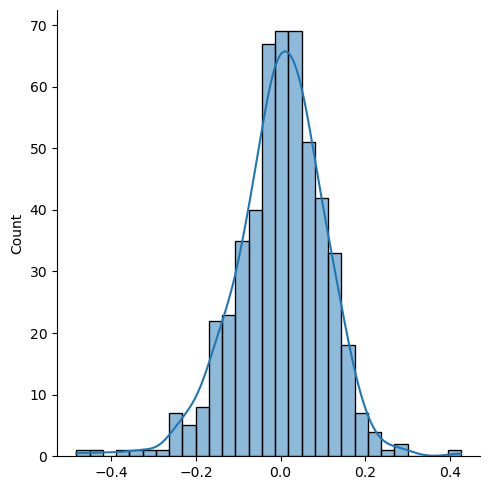

In [486]:
# Residual = the difference between the observed and predicted values
res_model5 = y_train - y_train_pred
sns.displot(res_model5, kde = True)
plt.show()

In [488]:
#for model 21
##Train set predicted values
y_train_pred1 = lr21_model.predict(X_train_rfe21_sm)
y_train_pred1

576    0.748567
426    0.471085
728    0.398469
482    0.555271
111    0.289112
         ...   
578    0.821242
53     0.191425
350    0.296154
79     0.346527
520    0.647238
Length: 510, dtype: float64

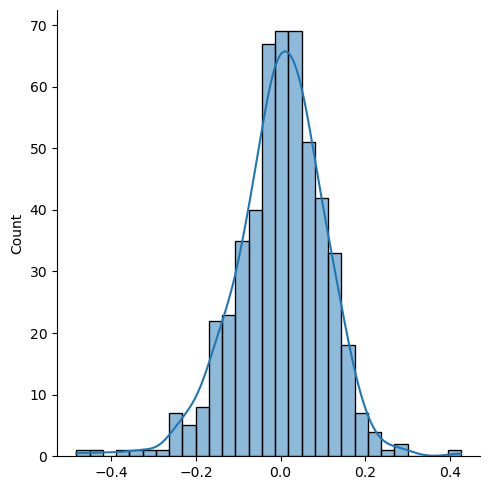

In [490]:
# Residual = the difference between the observed and predicted values
res_model21 = y_train - y_train_pred
sns.displot(res_model21, kde = True)
plt.show()

In [492]:
# Sum of residuals (should ideally be zero or very close to zero)
print(res_model5.sum())
print(res_model21.sum())

-4.571898415406395e-13
-4.571898415406395e-13


In [500]:
# Mean Squared Error for both models
print(mean_squared_error(y_true = y_train, y_pred = y_train_pred))
print(mean_squared_error(y_true = y_train, y_pred = y_train_pred1))

0.011103586137637728
0.008531337722195024


#### <font color = 'Green'> Residual Comparision result:
- The sum of Residual errors is very close to zero for both models
- The sum of Residual errors is more close to zero for model#21
- The MSE is less for the model#21 as compared to model#5

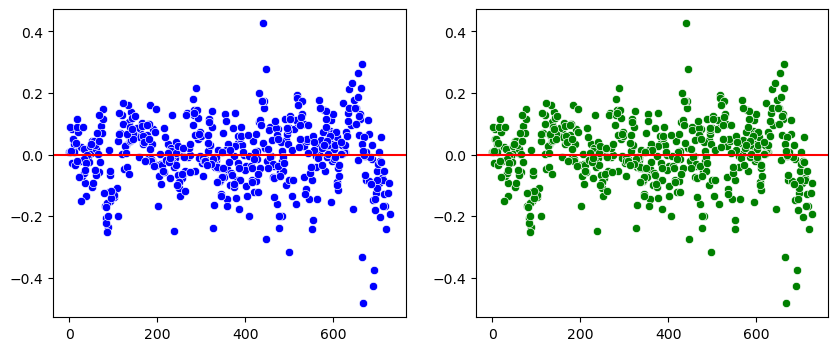

In [510]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.scatterplot(res_model5, color = 'blue')
plt.axhline(y = 0, color = 'r', linestyle = '-') 

plt.subplot(1,2,2)
sns.scatterplot(res_model21, color = 'green')
plt.axhline(y = 0, color = 'r', linestyle = '-') 

plt.show()

Another assumption in Linear Regression: Error terms are independent of each other.¶
The above two scatter plots verify that our error terms are independent for both models. We could homogenously fit line Y = 0 in both graphs.

#### Another assumption of Linear Regression : <font color = 'green'> Homoscedasticity
- Error Terms should have constant 'Variance'
- Error is constant across the values of the dependent variable.
- Plot the residuals against the predicted values. The data is homoscedastic if the points are randomly scattered around zero or in a horizontal band. The data is heteroscedastic if the points form a pattern, like a funnel, curve, or cluster.

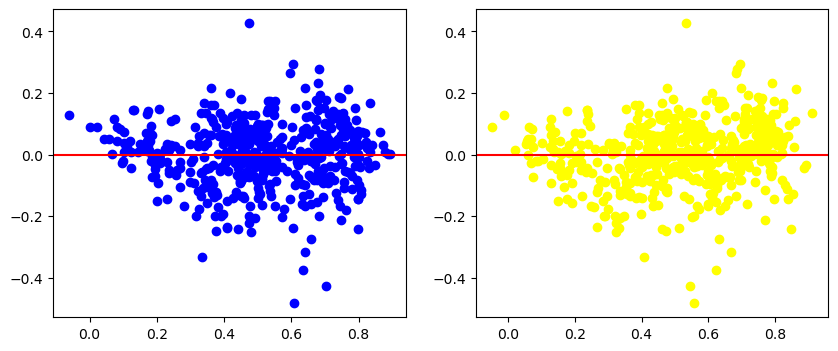

In [516]:
#Let us check out Homoscedasticity for our two models (residuals against predicted values)
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.scatter( y_train_pred, res_model5, color = 'blue')
plt.axhline(y = 0, color = 'r', linestyle = '-') 

plt.subplot(1,2,2)
plt.scatter(y_train_pred1, res_model21,  color = 'yellow')
plt.axhline(y = 0, color = 'r', linestyle = '-') 

plt.show()

# Plotting the 'actual y' vs. 'precited y' for our train set

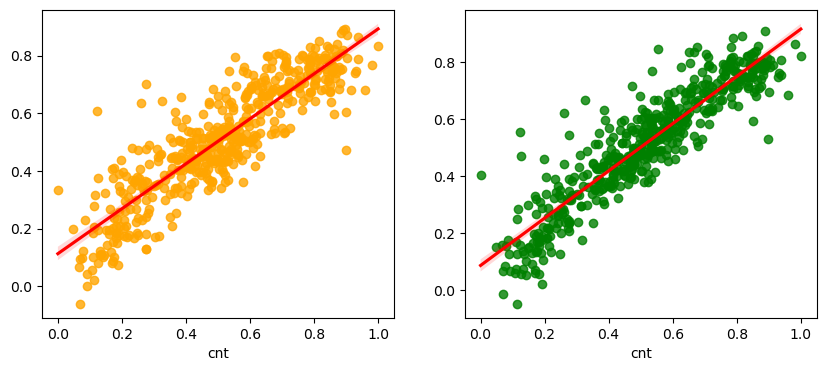

In [521]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.regplot(x = y_train, y = y_train_pred, color = 'orange', line_kws=dict(color="r"))

plt.subplot(1,2,2)
sns.regplot(x = y_train, y = y_train_pred1, color = 'green', line_kws=dict(color="r"))

plt.show()

### Making predictions or drawing inferences (from Test set)
- Process is to:
-- fit() on the train set
-- transform() on the test set

In [525]:
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Light Rain,Mist and Few Clouds,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,1,0,0,0,0,0,1,0


In [551]:
numeric_vars = ['temp', 'atemp','humidity', 'windspeed', 'cnt']

In [553]:
#scaler.transform would scale the values between 0 & 1 using MinMaxScaling
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])

#To check if values are in the range [0,1]
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Light Rain,Mist and Few Clouds,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [555]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Light Rain,Mist and Few Clouds,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [557]:
y_test = df_test.pop('cnt')
X_test = df_test

In [559]:
# for model#5
X_test_new_model5 = X_test[X_train_rfe5.columns]

#for model#21
X_test_new_model21 = X_test[X_train_rfe21.columns]

In [561]:
# for model#5
X_test_new_model5_sm = sm.add_constant(X_test_new_model5)

# for model#21
X_test_new_model21_sm = sm.add_constant(X_test_new_model21)

In [562]:
# for model#5
y_test_pred = lr5_model.predict(X_test_new_model5_sm)

# for model#21
y_test_pred1 = lr21_model.predict(X_test_new_model21_sm)

### y_test vs.y_test_pred

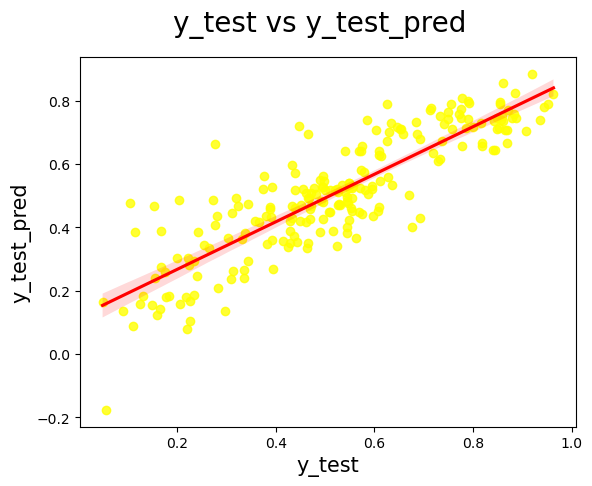

In [566]:
#for model 5
fig = plt.figure()
sns.regplot(x = y_test, y = y_test_pred, color = 'yellow', line_kws=dict(color="r"))
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize  = 15)
plt.ylabel('y_test_pred', fontsize  = 15)
plt.show()

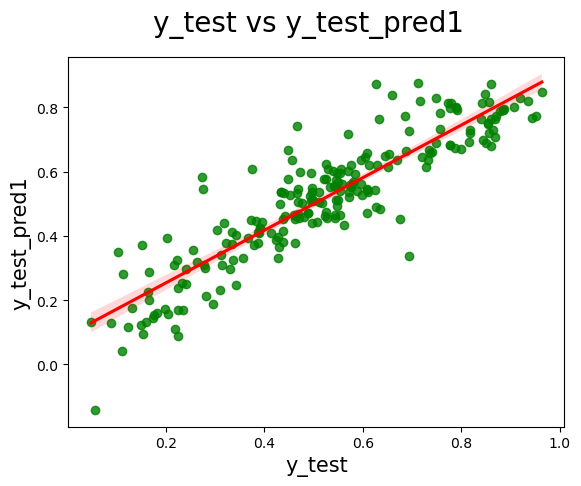

In [568]:
#for model 21
fig = plt.figure()
sns.regplot(x = y_test, y = y_test_pred1, color = 'green', line_kws=dict(color="r"))
fig.suptitle('y_test vs y_test_pred1', fontsize = 20)
plt.xlabel('y_test', fontsize  = 15)
plt.ylabel('y_test_pred1', fontsize  = 15)
plt.show()

### Now $R^2$ score for the Test Set

In [571]:
# For model#5
r2_score(y_true = y_test, y_pred = y_test_pred)

0.741735144131702

In [573]:
# For model#21
r2_score(y_true = y_test, y_pred = y_test_pred1)

0.8116519201061214

In [575]:
#Adjusted R^2
#adj r2  = 1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2_model5 = 1-(1-0.7407973963869227)*(183-1)/(183-10-1)
print(Adj_r2_model5)

Adj_r2_model21 = 1-(1-0.8070080015221603)*(183-1)/(183-14-1)
print(Adj_r2_model21)

0.7257274775722089
0.7909253349823404


#### <font color = 'Magenta'> $R^2$ and adj $R^2$ scores for model#21 is within 4% of the train set. For model#5, the scores are within 6% of the train set.

#### Though model#5 gives a satisfactory $R^2$ score (74%), model#21 gives a better $R^2$ score (81%) and the values are close to the train set. Also 'actual y' vs. 'predicted y' is better for model#21.
### <font color = 'green'> Hence we will keep model#21 as our final model

### Summarising model#21

In [580]:
# Features coefficients
lr21_model.params

const                        0.116624
year                         0.233112
holiday                     -0.059027
workingday                   0.046945
temp                         0.491406
Jan                         -0.024833
Jul                         -0.048693
Sep                          0.080155
Saturday                     0.055499
Light Snow and Light Rain   -0.305606
Mist and Few Clouds         -0.079833
spring                      -0.071711
summer                       0.035436
winter                       0.081889
dtype: float64

### Major Inferences:
#### 1- Assumptions of Linear Regression are satisfied.
#### 2- Summary:
- Temperature influences the Bike rentals the most. The higher the temperature, the more are the rentals. This was the same inference we drew from EDA.
- The business concept is gaining popularity. Even if all other factors are taken away, still the business will grow by about 25% year by year
- Light Snow and Light Rain affect Bike rentals the most in a negative way (Same inference from EDA)
- During the spring season bike rentals are less (same inferences by EDA).

#### <font color = 'Green'> The Bike rental company should focus on the above points to stay in the competition and accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.